# MUCT Results

This jupyter notebook summarises the results of the active appearance models which were trained using the *menpo* Python Package.  For more information regarding the training of these models please refer to:

1. Section 4 of the Review Paper
2. The Active Appearance Model base class contained within *aam.py*
3. The MUCT specific subclass of the base *muctAAM.py*
4. The holisitc AAM and patch AAM models described within *muct_aam_hol.py* and *muct_aam_patch.py*

This notebook will contained the cumulative error distribution curves produced by the models as well as a selection from literature.

-------------------------------------------------------------------------------------------------------------------------

## Resource Utilisation

| Model | Time (hh:mm:ss)   |  Avg # CPUs Used |  Memory Used (GB) |
|-------|-------------------|------------------|-------------------|
|  hAAM |     01:26:56      |       7.81       |        4.9        |
|  pAAM |     01:36:25      |       7.77       |        4.6        |
-------------------------------------------------------------------------------------------------------------------------
## Test Set

A brief description of the test set used during the experiment.  Note that the same test set was used for both holistic and patch experiments.

In [1]:
import os
with open('muct_aam_hol_testset.txt', 'r') as f:
    test_set_filenames = f.read().split('\n')

print("The test set comprised of %i images\n" % len(test_set_filenames))
print("Listing the first 10 images:")

# Print summary
test_set_filenames = [os.path.basename(filename) for filename in test_set_filenames]
print("\t".join(test_set_filenames[:10]) + "...")

The test set comprised of 875 images

Listing the first 10 images:
i237ud-fn.jpg	i267vd-mn.jpg	i405wa-fn.jpg	i058qd-mn.jpg	i248vd-fn.jpg	i016se-mn.jpg	i255ve-mn.jpg	i233td-fn.jpg	i026sd-fn.jpg	i298vb-fn.jpg...


## Cumulative Error Distribution Curves

The following chart shows the normalised error distribution as produced by the holisitic and patch AAMs.  To our knowledge error distributions have not been reported solely for the MUCT dataset using the MULTIPIE-68.

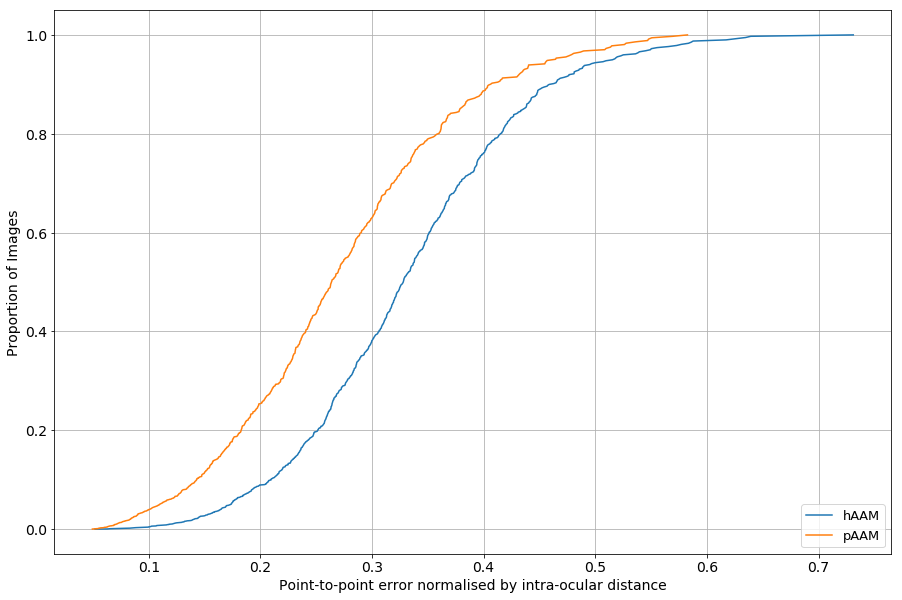

In [2]:
import numpy as np

# Import and configure matplotlib
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['font.size'] = 14
import matplotlib.pyplot as plt


# These files contains the CED data from experimentation & literature
FILES = ['muct_aam_hol.npy', 'muct_aam_patch.npy']
LABELS = ['hAAM', 'pAAM']

for filename, label in zip(FILES, LABELS):
    
    # Load the data
    data = np.load(filename)
    
    # Normalise
    data[1] /= np.max(data[1])
    
    # Plot
    plt.plot(data[0], data[1], label=label)


# Add details to plot
plt.legend(loc='lower right', prop={'size': 13});
plt.grid();
plt.xlabel('Point-to-point error normalised by intra-ocular distance');
plt.ylabel('Proportion of Images');